## Predcting the percentage of the students depending on their study hours.


In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Loading the dataset from a link
link = "http://bit.ly/w-data"
df= pd.read_csv(link)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


by having a quick glance at the data, we notice that as the number of hours increase the scores increase

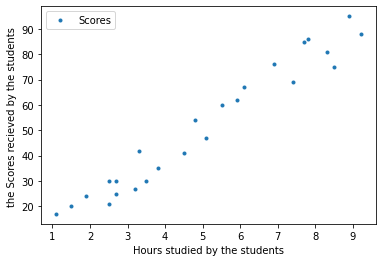

In [4]:
##let's do some EDA(Exploratory Data Analysis) to help us make sure of the relation between the hours and the scores
df.plot(x='Hours',y="Scores",style=".")
plt.xlabel("Hours studied by the students")
plt.ylabel("the Scores recieved by the students ")
plt.show()

now we are sure that there is a positive correlation between the study hours and the score percentage 

In [5]:
## dividing the data into attributes as X and labels as y
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  


In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

after splitting the data, it's time to train our model

In [7]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

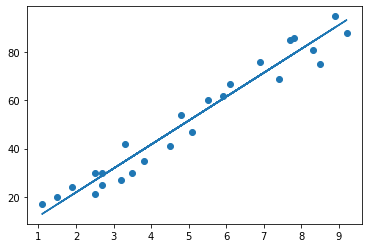

In [8]:
## let's plot our regression line
Line= reg.coef_*X+reg.intercept_
## let's plot it on our test data
plt.scatter(X,y)
plt.plot(X,Line);
plt.show()

## now let's predict on our testing set

In [9]:
print(X_test)
y_pred=reg.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [10]:
## let's compare the actual scores to our predicted ones
print("actual scores is {}".format(y_test))
print("predicted scores is {}".format(y_pred))

actual scores is [20 27 69 30 62 35 24]
predicted scores is [16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [11]:
## let's add it to a data frame so it's a better looking and better understanded
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [12]:
## we can also test our model on our actual data
hours = [[9.25]]
own_pred=reg.predict(hours)
print("Predicted Score = {}".format(own_pred))



Predicted Score = [93.89272889]


our model predicted a score of 93.9 if a student studied 9.25 hours 

## the last step now is to evaluate our model,  Model Evaluation permits us to evaluate the performance of a model, compare different models, to choose the best one to use for a specific dataset


There are different techniques for Model Evaluation, which depend on the specific task we want to solve
as we are now working with a regression task 
the most popular metrics are:

1st: Mean Absolute Error: the average of the difference between the actual value and the predicted one. It measures how far the predictions are from the actual output. The lower the MAE, the better the model.

2nd:Root Mean Squared Error"the square root of Mean Squared Error (MSE). MSE calculates the average of the square of the difference between the actual values and the predicted ones.

3rd: R2 score — the proportion of variance in Y that can be explained by X.

for this task I will use the Mean Absolute Error, which is also from sklearn

In [13]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :{}".format(MAE))

Mean Absolute Error :4.130879918502486
